Fiona Wilson 27/11/2023

# Example Dashboard

## Bar of pie

Make a "bar of pie" chart where the first slice of the pie is "exploded" into a bar chart with a further breakdown of said slice's characteristics. The example demonstrates using a figure with multiple sets of axes and using the axes patches list to add two ConnectionPatches to link the subplot charts.

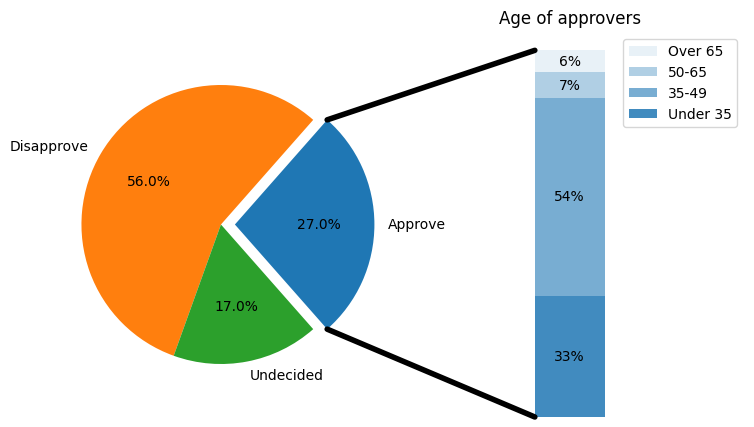

In [5]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [.27, .56, .17]
labels = ['Approve', 'Disapprove', 'Undecided']
explode = [0.1, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.33, .54, .07, .06]
age_labels = ['Under 35', '35-49', '50-65', 'Over 65']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Age of approvers')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

## Firefox

This example shows how to create the Firefox logo with path and patches.

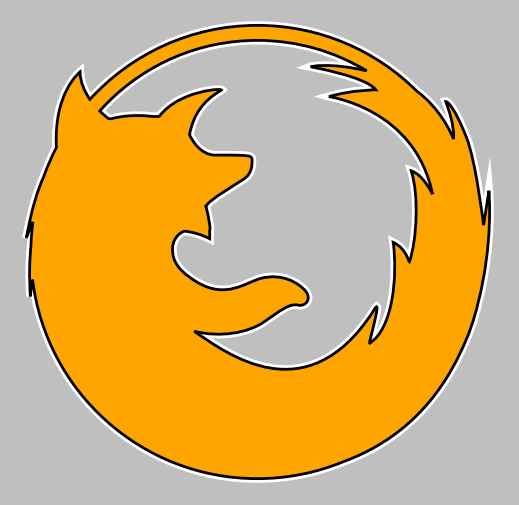

In [3]:
import re

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.patches as patches
from matplotlib.path import Path

# From: https://dmitrybaranovskiy.github.io/raphael/icons/#firefox
firefox = "M28.4,22.469c0.479-0.964,0.851-1.991,1.095-3.066c0.953-3.661,0.666-6.854,0.666-6.854l-0.327,2.104c0,0-0.469-3.896-1.044-5.353c-0.881-2.231-1.273-2.214-1.274-2.21c0.542,1.379,0.494,2.169,0.483,2.288c-0.01-0.016-0.019-0.032-0.027-0.047c-0.131-0.324-0.797-1.819-2.225-2.878c-2.502-2.481-5.943-4.014-9.745-4.015c-4.056,0-7.705,1.745-10.238,4.525C5.444,6.5,5.183,5.938,5.159,5.317c0,0-0.002,0.002-0.006,0.005c0-0.011-0.003-0.021-0.003-0.031c0,0-1.61,1.247-1.436,4.612c-0.299,0.574-0.56,1.172-0.777,1.791c-0.375,0.817-0.75,2.004-1.059,3.746c0,0,0.133-0.422,0.399-0.988c-0.064,0.482-0.103,0.971-0.116,1.467c-0.09,0.845-0.118,1.865-0.039,3.088c0,0,0.032-0.406,0.136-1.021c0.834,6.854,6.667,12.165,13.743,12.165l0,0c1.86,0,3.636-0.37,5.256-1.036C24.938,27.771,27.116,25.196,28.4,22.469zM16.002,3.356c2.446,0,4.73,0.68,6.68,1.86c-2.274-0.528-3.433-0.261-3.423-0.248c0.013,0.015,3.384,0.589,3.981,1.411c0,0-1.431,0-2.856,0.41c-0.065,0.019,5.242,0.663,6.327,5.966c0,0-0.582-1.213-1.301-1.42c0.473,1.439,0.351,4.17-0.1,5.528c-0.058,0.174-0.118-0.755-1.004-1.155c0.284,2.037-0.018,5.268-1.432,6.158c-0.109,0.07,0.887-3.189,0.201-1.93c-4.093,6.276-8.959,2.539-10.934,1.208c1.585,0.388,3.267,0.108,4.242-0.559c0.982-0.672,1.564-1.162,2.087-1.047c0.522,0.117,0.87-0.407,0.464-0.872c-0.405-0.466-1.392-1.105-2.725-0.757c-0.94,0.247-2.107,1.287-3.886,0.233c-1.518-0.899-1.507-1.63-1.507-2.095c0-0.366,0.257-0.88,0.734-1.028c0.58,0.062,1.044,0.214,1.537,0.466c0.005-0.135,0.006-0.315-0.001-0.519c0.039-0.077,0.015-0.311-0.047-0.596c-0.036-0.287-0.097-0.582-0.19-0.851c0.01-0.002,0.017-0.007,0.021-0.021c0.076-0.344,2.147-1.544,2.299-1.659c0.153-0.114,0.55-0.378,0.506-1.183c-0.015-0.265-0.058-0.294-2.232-0.286c-0.917,0.003-1.425-0.894-1.589-1.245c0.222-1.231,0.863-2.11,1.919-2.704c0.02-0.011,0.015-0.021-0.008-0.027c0.219-0.127-2.524-0.006-3.76,1.604C9.674,8.045,9.219,7.95,8.71,7.95c-0.638,0-1.139,0.07-1.603,0.187c-0.05,0.013-0.122,0.011-0.208-0.001C6.769,8.04,6.575,7.88,6.365,7.672c0.161-0.18,0.324-0.356,0.495-0.526C9.201,4.804,12.43,3.357,16.002,3.356z"  # noqa


def svg_parse(path):
    commands = {'M': (Path.MOVETO,),
                'L': (Path.LINETO,),
                'Q': (Path.CURVE3,)*2,
                'C': (Path.CURVE4,)*3,
                'Z': (Path.CLOSEPOLY,)}
    vertices = []
    codes = []
    cmd_values = re.split("([A-Za-z])", path)[1:]  # Split over commands.
    for cmd, values in zip(cmd_values[::2], cmd_values[1::2]):
        # Numbers are separated either by commas, or by +/- signs (but not at
        # the beginning of the string).
        points = ([*map(float, re.split(",|(?<!^)(?=[+-])", values))] if values
                  else [(0., 0.)])  # Only for "z/Z" (CLOSEPOLY).
        points = np.reshape(points, (-1, 2))
        if cmd.islower():
            points += vertices[-1][-1]
        codes.extend(commands[cmd.upper()])
        vertices.append(points)
    return np.array(codes), np.concatenate(vertices)


# SVG to Matplotlib
codes, verts = svg_parse(firefox)
path = Path(verts, codes)

xmin, ymin = verts.min(axis=0) - 1
xmax, ymax = verts.max(axis=0) + 1

fig = plt.figure(figsize=(5, 5), facecolor="0.75")  # gray background
ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1,
                  xlim=(xmin, xmax),  # centering
                  ylim=(ymax, ymin),  # centering, upside down
                  xticks=[], yticks=[])  # no ticks

# White outline (width = 6)
ax.add_patch(patches.PathPatch(path, facecolor='none', edgecolor='w', lw=6))
# Actual shape with black outline
ax.add_patch(patches.PathPatch(path, facecolor='orange', edgecolor='k', lw=2))

plt.show()  # Display

## Lines with a ticked patheffect

Ticks can be added along a line to mark one side as a barrier using [TickedStroke](https://matplotlib.org/stable/api/patheffects_api.html#matplotlib.patheffects.TickedStroke). You can control the angle, spacing, and length of the ticks.

The ticks will also appear appropriately in the legend.

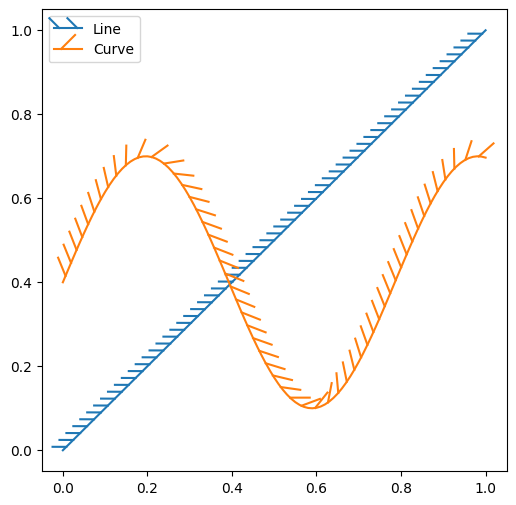

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import patheffects

# Plot a straight diagonal line with ticked style path
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot([0, 1], [0, 1], label="Line",
        path_effects=[patheffects.withTickedStroke(spacing=7, angle=135)])

# Plot a curved line with ticked style path
nx = 101
x = np.linspace(0.0, 1.0, nx)
y = 0.3*np.sin(x*8) + 0.4
ax.plot(x, y, label="Curve", path_effects=[patheffects.withTickedStroke()])

ax.legend()

plt.show()